# Lab: Feature Engineering
_Week7 - Day1 - Afternoon_

## Instructions

Here we will work on cleaning some of the other columns in the dataset using the techniques that we used before in the lessons.

- Check for null values in the numerical columns.
- Use appropriate methods to clean the columns `GEOCODE2`, `WEALTH1`, `ADI`, `DMA`,and `MSA`.
- Use appropriate EDA technique where ever necessary.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('learningSet.csv')
print(data.shape)
data.head()

C:\Users\marta\AppData\Local\Temp\ipykernel_2188\2056255270.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('learningSet.csv')


(95412, 481)


,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGE,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,NUMCHLD,INCOME,GENDER,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,,,,XXXX,T2,36,60.0,,,,,,,NaN,NaN,F,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0,39,34,18,10,2,1,,,,5.0,,,,,,,,,,,,,,,,,,,,,X,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9604.

## Missing values (null values)

In [3]:
df = pd.DataFrame(data.isna().sum()).reset_index()
df.columns = ['column_name', 'nulls']
df[df['nulls']>0]

,column_name,nulls
16,AGE,23665
23,NUMCHLD,83026
24,INCOME,21286
26,WEALTH1,44732
28,MBCRAFT,52854
...,...,...
455,RAMNT_24,77674
466,NEXTDATE,9973
467,TIMELAG,9973
479,CLUSTER2,132


## Clean columns
### Column `GEOCODE2`

`GEOCODE` | Geo Cluster Code indicating the level geography at which a record matches the census data. A nominal or symbolic field. <br /> Blank=No code has been assigned or did not match at any level.

`GEOCODE2` County Size Code

In [4]:
data['GEOCODE2'].value_counts(dropna=False)

A      34484
B      28505
D      16580
C      15524
         187
NaN      132
Name: GEOCODE2, dtype: int64

In [5]:
data['GEOCODE2'].isna().sum()/len(list(data['GEOCODE2']))

0.001383473776883411

With the information provided in the description, it is hard to decide what to do with the data. Alternatives:
- Drop rows: relatively few nulls and missing
- K-NN model: probably best (or retrieving the information from the internet or from the managers) but too little information in order to make a good decision about what variables would be the best to predict.

In [69]:
# create a copy of the original dataframe and work on it
data_copy = data.copy()

In [70]:
# keep only the rows that have no missing values
data_copy = data_copy[data_copy['GEOCODE2'].notna()]

In [71]:
data_copy['GEOCODE2'].isna().sum()/len(list(data_copy['GEOCODE2']))

0.0

### Column `WEALTH1`
Wealth Rating

In [72]:
data_copy['WEALTH1'].value_counts(dropna=False)

NaN    44632
9.0     7580
8.0     6785
7.0     6196
6.0     5823
5.0     5277
4.0     4808
3.0     4233
2.0     4083
1.0     3452
0.0     2411
Name: WEALTH1, dtype: int64

In [73]:
data_copy['WEALTH1'].isna().sum()/len(list(data_copy['WEALTH1']))

0.4684298908480269

In [74]:
data_copy.dtypes['WEALTH1']

dtype('float64')

In [75]:
# It would be interestig to understand the difference between both and analize if it's possible to infere one from another
data_copy['WEALTH2'].value_counts(dropna=False)

NaN    43767
9.0     6515
8.0     5967
7.0     5675
6.0     5490
5.0     5342
4.0     5067
3.0     5038
2.0     4966
1.0     4182
0.0     3271
Name: WEALTH2, dtype: int64

In [76]:
data_copy['CLUSTER2'].value_counts(dropna=False)

13.0    3466
5.0     3154
57.0    2666
59.0    2653
15.0    2559
        ... 
30.0     647
46.0     644
29.0     569
40.0     369
6.0      211
Name: CLUSTER2, Length: 62, dtype: int64

I'm going to use the numerical here to estimate `WEALTH1`

In [15]:
numerical = data.select_dtypes(np.number)

In [16]:
# done in the class notebook
numerical['INCOME'].value_counts(dropna=False)

NaN    21286
5.0    15451
2.0    13114
4.0    12732
1.0     9022
3.0     8558
6.0     7778
7.0     7471
Name: INCOME, dtype: int64

In [17]:
m = numerical['INCOME'].mode()[0]
numerical['INCOME'] = numerical['INCOME'].fillna(m) 

In [18]:
# class notebook
numerical['CLUSTER2'] = numerical['CLUSTER2'].fillna(np.ceil(np.mean(numerical['CLUSTER2'])))

In [23]:
numerical.shape

(95412, 407)

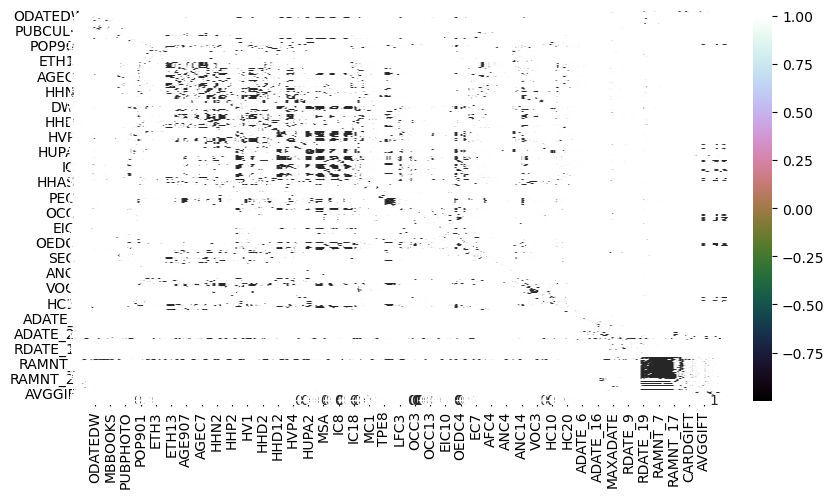

In [24]:
correlations_matrix = numerical.corr()

In [28]:
# store the correlations sorted
corr_wealth1 = correlations_matrix['WEALTH1'].sort_values()
type(corr_wealth1)


pandas.core.series.Series

In [47]:
# retrieve the strongest positive correlations
corr_wealth1.iloc[-10:]

IC19        0.622041
IC10        0.625356
IC1         0.676470
IC3         0.700671
IC2         0.709275
IC4         0.718460
WEALTH2     0.869431
WEALTH1     1.000000
ADATE_5          NaN
ADATE_15         NaN
Name: WEALTH1, dtype: float64

In [48]:
# and the strongest negative correlations
corr_wealth1.iloc[:10]

IC15       -0.687078
IC6        -0.675964
CLUSTER2   -0.669157
IC16       -0.639110
RDATE_5    -0.621016
HHAS4      -0.596256
IC7        -0.574923
EC3        -0.571213
EC2        -0.531051
HHAS2      -0.528599
Name: WEALTH1, dtype: float64

The different IC provide similar and are correlated among them so I'll use only IC4 for the KNN

In [44]:
correlations_matrix['IC4'].sort_values().iloc[-8:]

IC11        0.778385
IC5         0.882082
IC1         0.929737
IC3         0.971395
IC2         0.973616
IC4         1.000000
ADATE_5          NaN
ADATE_15         NaN
Name: IC4, dtype: float64

Check the missing values in the variables with strongest correlation with `WEALTH1`

In [51]:
numerical['RDATE_5'].isna().sum()/len(list(numerical['RDATE_5']))

0.9999056722424853

In [52]:
numerical['HHAS4'].isna().sum()/len(list(numerical['HHAS4']))

0.0

In [53]:
numerical['HHAS2'].isna().sum()/len(list(numerical['HHAS2']))

0.0

In [54]:
# To test the KNN imputer:
df1 = numerical[['WEALTH1', 'WEALTH2', 'CLUSTER2', 'IC4', 'HHAS4', 'HHAS2']]
df1.head()

,WEALTH1,WEALTH2,CLUSTER2,IC4,HHAS4,HHAS2
0,NaN,5.0,39.0,378,1,4
1,9.0,9.0,1.0,1037,3,2
2,1.0,1.0,60.0,340,11,8
3,4.0,0.0,41.0,423,20,14
4,2.0,NaN,26.0,321,14,8


#### Using the KNN Imputer
With the selected variables

In [19]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
# we can use variables like "cluster2"

In [55]:
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df1), columns = df1.columns)
df_scaled.head()

,WEALTH1,WEALTH2,CLUSTER2,IC4,HHAS4,HHAS2
0,NaN,0.555556,0.622951,0.252000,0.010101,0.040404
1,1.000000,1.000000,0.000000,0.691333,0.030303,0.020202
2,0.111111,0.111111,0.967213,0.226667,0.111111,0.080808
3,0.444444,0.000000,0.655738,0.282000,0.202020,0.141414
4,0.222222,NaN,0.409836,0.214000,0.141414,0.080808


In [56]:
imputer = KNNImputer(n_neighbors=5)
df_imputer = imputer.fit_transform(df_scaled)

In [57]:
df_imputer_unscaled = pd.DataFrame(scaler.inverse_transform(df_imputer), columns=df1.columns)
print("After imputer")
display(df_imputer_unscaled.head())
print("Before imputer")
display(df1.head())

After imputer


,WEALTH1,WEALTH2,CLUSTER2,IC4,HHAS4,HHAS2
0,4.8,5.0,39.0,378.0,1.0,4.0
1,9.0,9.0,1.0,1037.0,3.0,2.0
2,1.0,1.0,60.0,340.0,11.0,8.0
3,4.0,0.0,41.0,423.0,20.0,14.0
4,2.0,3.4,26.0,321.0,14.0,8.0


Before imputer


,WEALTH1,WEALTH2,CLUSTER2,IC4,HHAS4,HHAS2
0,NaN,5.0,39.0,378,1,4
1,9.0,9.0,1.0,1037,3,2
2,1.0,1.0,60.0,340,11,8
3,4.0,0.0,41.0,423,20,14
4,2.0,NaN,26.0,321,14,8


In [58]:
df_imputer_unscaled['WEALTH1_final'] = np.ceil(df_imputer_unscaled['WEALTH1'])
df_imputer_unscaled['WEALTH2_final'] = np.ceil(df_imputer_unscaled['WEALTH2'])
df_imputer_unscaled.head()

,WEALTH1,WEALTH2,CLUSTER2,IC4,HHAS4,HHAS2,WEALTH1_final,WEALTH2_final
0,4.8,5.0,39.0,378.0,1.0,4.0,5.0,6.0
1,9.0,9.0,1.0,1037.0,3.0,2.0,9.0,9.0
2,1.0,1.0,60.0,340.0,11.0,8.0,1.0,1.0
3,4.0,0.0,41.0,423.0,20.0,14.0,4.0,0.0
4,2.0,3.4,26.0,321.0,14.0,8.0,2.0,4.0


In [77]:
# incorporate the new columns to the full dataframe
data_copy['WEALTH1_final'] = df_imputer_unscaled['WEALTH1_final']
data_copy['WEALTH2_final'] = df_imputer_unscaled['WEALTH2_final']

In [78]:
# check values including missing ones
data_copy['WEALTH1_final'].value_counts(dropna=False). sort_index()

0.0     2809
1.0     4942
2.0     7840
3.0     9904
4.0    10085
5.0     5805
6.0    17668
7.0    11581
8.0    11029
9.0    13617
Name: WEALTH1_final, dtype: int64

In [79]:
data_copy['WEALTH2_final'].value_counts(dropna=False). sort_index()

0.0     3525
1.0     5278
2.0     8212
3.0    10229
4.0    10377
5.0     6065
6.0    18300
7.0    11390
8.0    10287
9.0    11617
Name: WEALTH2_final, dtype: int64

In [80]:
# drop `WEALTH1` and 'WEALTH2'
data_copy = data_copy.drop(columns=['WEALTH1', 'WEALTH2'])

In [81]:
data_copy.shape

(95280, 481)

### Column `ADI`
ADI code

_I don't understand the meaning of this column (and I've looked at the documentation and googled a bit)_

- In the following steps, I show different alternatives for grouping the values in order to have more balanced data.
- I apply the qcut method so all the categories have a similar number of entries.
- The other options won't be removed in case the "client" opts for another alternative.

In [82]:
data_copy['ADI'].value_counts()

13.0     7296
51.0     4622
65.0     3765
57.0     2836
105.0    2617
         ... 
651.0       1
103.0       1
601.0       1
161.0       1
147.0       1
Name: ADI, Length: 204, dtype: int64

In [21]:
data_copy['ADI'].describe().T

count    95280.000000
mean       187.356402
std        137.019184
min          0.000000
25%         65.000000
50%        175.000000
75%        279.000000
max        651.000000
Name: ADI, dtype: float64

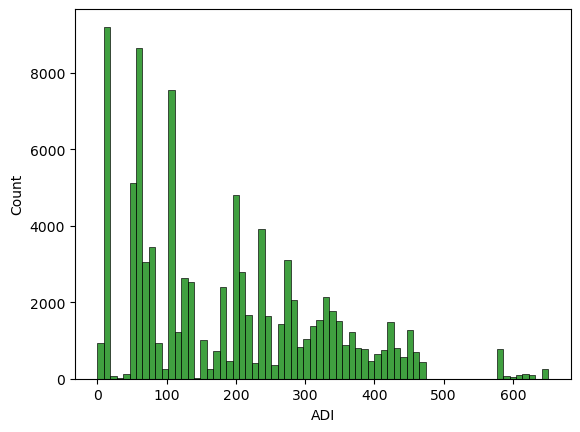

In [19]:
#sns.countplot(x=data['ADI'], data=data, order=list(data['ADI'].value_counts().index), palette="cubehelix")
sns.histplot(data_copy[data_copy['ADI'].notna()]['ADI'], color="green") 
plt.show()

In [20]:
bins = pd.cut(data_copy['ADI'],6)
#superstore['BinnedSales'] = pd.cut(superstore['Sales'], 5, labels = labels)
bins.value_counts()


(-0.651, 108.5]    36162
(108.5, 217.0]     22912
(217.0, 325.5]     18518
(325.5, 434.0]     12925
(434.0, 542.5]      3311
(542.5, 651.0]      1452
Name: ADI, dtype: int64

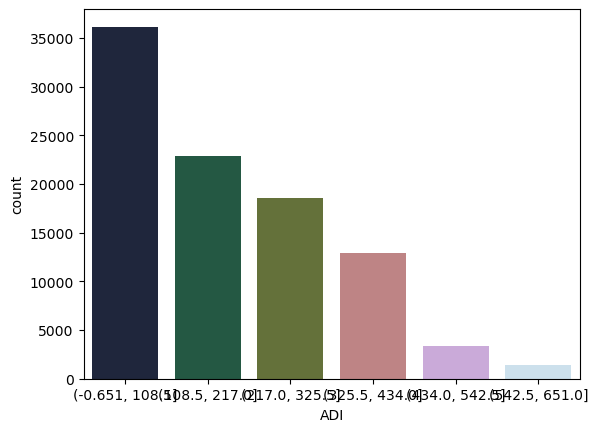

In [27]:
sns.countplot(x="ADI", data = pd.DataFrame(bins), palette="cubehelix")
plt.show()

In [30]:
bins2 = pd.cut(data_copy['ADI'],[0,100,200,300,400,500, 600, 700])
bins2.value_counts()

(0, 100]      30955
(100, 200]    21288
(200, 300]    20662
(300, 400]    13417
(400, 500]     6663
(500, 600]      844
(600, 700]      608
Name: ADI, dtype: int64

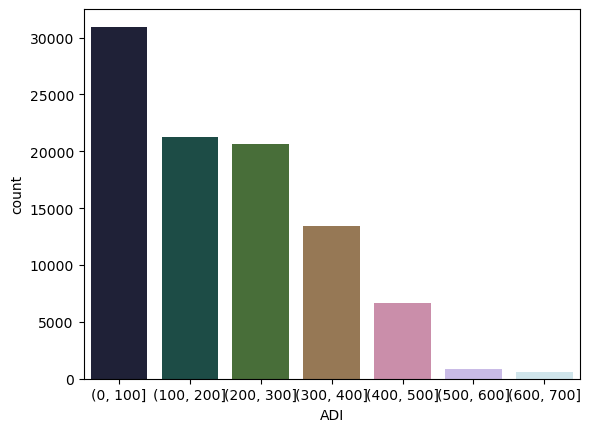

In [31]:
sns.countplot(x="ADI", data = pd.DataFrame(bins2), palette="cubehelix")
plt.show()

In [32]:
labels = ['A', 'B', 'C', 'D', 'E', 'F']
qbins = pd.qcut(data_copy['ADI'],6, labels=labels)
qbins.value_counts()

A    18315
D    16463
C    15978
F    15824
E    15254
B    13446
Name: ADI, dtype: int64

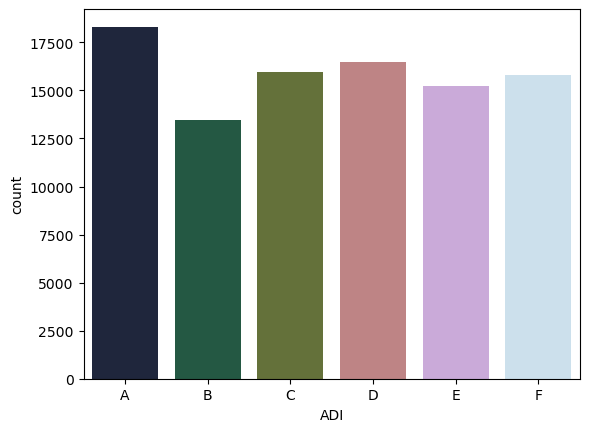

In [33]:
sns.countplot(x="ADI", data = pd.DataFrame(qbins), palette="cubehelix")
plt.show()

In [35]:
data['Binned_ADI'] = pd.qcut(data_copy['ADI'], 6, labels = labels)
data['Binned_ADI'].value_counts()

A    18315
D    16463
C    15978
F    15824
E    15254
B    13446
Name: Binned_ADI, dtype: int64

### Column `DMA`

DMA Code

According to [WunderCounter](https://www.wundercounter.com/counter/ip-tracker/134/) and other similar sources:

"A Designated Market Area (DMA) is a group of counties in the United States that are covered by a specific group of television stations. The term was coined by Nielsen Media Research, and they control the trademark on it. There are 210 DMAs in the United States."

- Inside the USA can take values from [500 to 881](https://www.spstechnical.com/DMACodes.htm) - so zero (0) could be like a missing value -> drop

In [43]:
# after removing the rows with missing values in column 'GEOCODE2' there are no missing values in this column either.
data_copy['DMA'].isna().sum()/len(list(data_copy['DMA']))

0.0

In [84]:
data_copy['DMA'].value_counts()

803.0    7296
602.0    4632
807.0    3765
505.0    2839
819.0    2588
         ... 
569.0       1
554.0       1
584.0       1
552.0       1
516.0       1
Name: DMA, Length: 206, dtype: int64

In [85]:
# number of entries with '0' value
data_copy['DMA'].value_counts()[0]

187

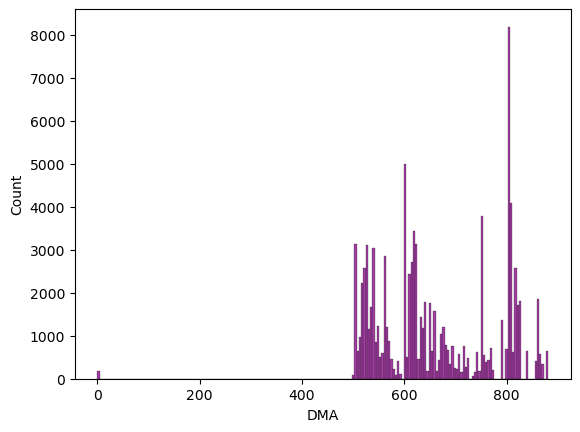

In [86]:
sns.histplot(data_copy[data_copy['DMA'].notna()]['DMA'], color="purple", bins=200) 
plt.show()

In [87]:
data_copy['DMA'].describe().T

count    95280.000000
mean       664.004072
std        116.363600
min          0.000000
25%        561.000000
50%        635.000000
75%        801.000000
max        881.000000
Name: DMA, dtype: float64

In [88]:
# drop the entries with zero values:
data_copy = data_copy[data_copy['DMA'] != 0] # we keep the rows that are not zero.
# data_copy['DMA'].value_counts()[0] # returns an error because there are no zeros anymore

In [89]:
data_copy['DMA'].describe().T # these number make more sense based on the information found online

count    95093.000000
mean       665.309834
std        112.687045
min        500.000000
25%        563.000000
50%        635.000000
75%        801.000000
max        881.000000
Name: DMA, dtype: float64

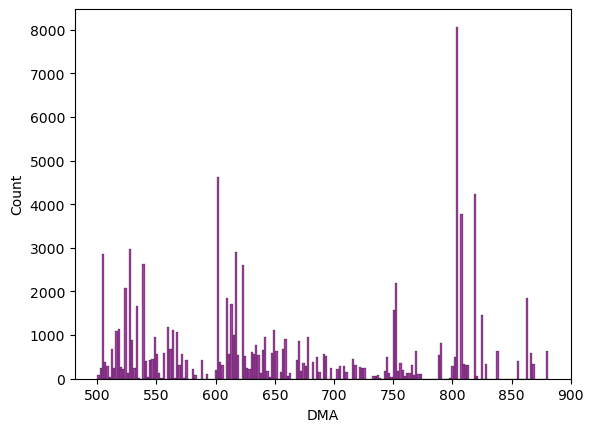

In [90]:
# plot again the data to viualize the distribution without the zero values
sns.histplot(data_copy[data_copy['DMA'].notna()]['DMA'], color="purple", bins=200) 
plt.show()

Further analysis:
- Group by bigger regions and assign a new code
- Divide each DMA by the population of the region to see if the imbalance among them is due to the different population in each DMA.

## Column `MSA`

MSA Code

"Metropolitan statistical areas (MSA) are delineated by the U.S. Office of Management and Budget (OMB) as having at least one urbanized area with a minimum population of 50,000. MSAs are typically cities and their linked surrounding areas." [Investopedia](https://www.investopedia.com/terms/m/msa.asp) 

In [91]:
data_copy['MSA'].value_counts()#.sort_index()

0.0       21146
4480.0     4606
1600.0     4059
2160.0     2586
520.0      1685
          ...  
9140.0        1
3200.0        1
9280.0        1
743.0         1
8480.0        1
Name: MSA, Length: 298, dtype: int64

In [92]:
# check for missing values
data_copy['MSA'].isna().sum()/len(list(data_copy['MSA']))

0.0

In [93]:
data_copy['MSA'].describe().T

count    95093.000000
mean      3534.681396
std       2862.439210
min          0.000000
25%        520.000000
50%       3360.000000
75%       5960.000000
max       9360.000000
Name: MSA, dtype: float64

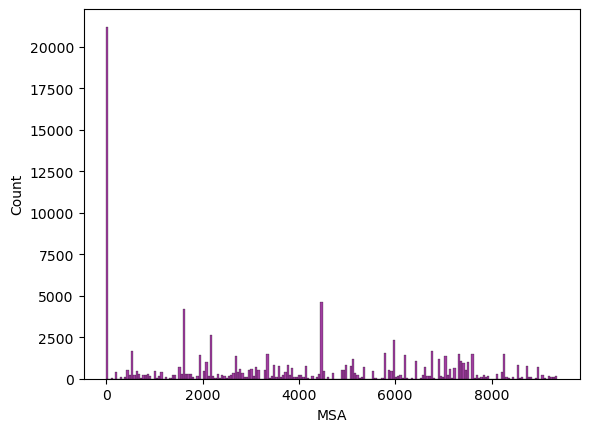

In [94]:
sns.histplot(data_copy[data_copy['MSA'].notna()]['MSA'], color="purple", bins=200) 
plt.show()

In [95]:
# entries (rows) with zero values
data_copy['MSA'].value_counts()[0]

21146

The information missing (zero values) could be replaced or inferred by using the zipcode since most of the zipcode will belong to an MSA area.

For our case, we will just drop the missing values (zero values).

In [96]:
data_copy = data_copy[data_copy['MSA'] != 0]

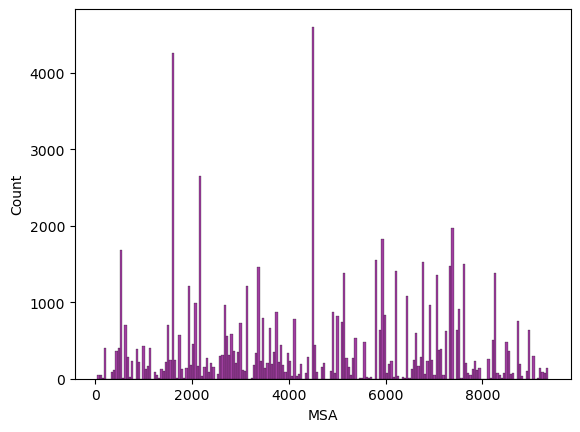

In [97]:
sns.histplot(data_copy[data_copy['MSA'].notna()]['MSA'], color="purple", bins=200) 
plt.show()